# Pit Stop Optimizer

In [6]:
# pip install fastf1 (without showing the process)
import subprocess

subprocess.run(['pip', 'install', 'fastf1'],
               stdout=subprocess.DEVNULL,
               stderr=subprocess.DEVNULL)


CompletedProcess(args=['pip', 'install', 'fastf1'], returncode=0)

This is initial python notebook invovlving just the monaco 2023 race for the overall pit spot optimizer project

## Fast F1

In [1]:
# FastF1 Library: Provides telemetry, lap times, tire wear, and pit stop data.
import fastf1
import pandas as pd
import logging
import warnings

# Disable logging from FastF1
logging.getLogger("fastf1").setLevel(logging.CRITICAL)

# Suppress all Python warnings
warnings.filterwarnings("ignore")

# Optional: Enable caching to speed up repeated runs
# fastf1.Cache.enable_cache('cache')

# Load Monaco GP Race (2023)
session = fastf1.get_session(2023, 'Monaco', 'R')
session.load()

# Extract laps data as a DataFrame
monaco2023 = session.laps


c:\Users\prana\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\prana\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\prana\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
print(monaco2023.head())

                    Time Driver DriverNumber                LapTime  \
0 0 days 01:03:27.458000    VER            1 0 days 00:01:24.238000   
1 0 days 01:04:46.825000    VER            1 0 days 00:01:19.367000   
2 0 days 01:06:05.899000    VER            1 0 days 00:01:19.074000   
3 0 days 01:07:24.028000    VER            1 0 days 00:01:18.129000   
4 0 days 01:08:42.047000    VER            1 0 days 00:01:18.019000   

   LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
0        1.0    1.0        NaT       NaT                    NaT   
1        2.0    1.0        NaT       NaT 0 days 00:00:20.954000   
2        3.0    1.0        NaT       NaT 0 days 00:00:20.854000   
3        4.0    1.0        NaT       NaT 0 days 00:00:20.835000   
4        5.0    1.0        NaT       NaT 0 days 00:00:20.745000   

             Sector2Time  ... FreshTyre             Team  \
0 0 days 00:00:37.420000  ...      True  Red Bull Racing   
1 0 days 00:00:37.366000  ...      True  Red Bull 

In [1]:
monaco2023.columns

NameError: name 'monaco2023' is not defined

add pit in, pit out lap aswell, which was removed.

From FastF1, useful columns include:

Driver → Driver code (e.g., VER for Verstappen)

Team → Team name

LapNumber → Lap count

LapTime → Time taken for each lap

Sector1Time, Sector2Time, Sector3Time → Sector timings

Stint → Number of tire stints

FreshTyre → If the driver used fresh tires

In [4]:

monaco2023_selected = monaco2023[["Driver", 
                   "Team", 
                   "LapNumber", 
                   "LapTime", 
                   "Sector1Time", 
                   "Sector2Time", 
                   "Sector3Time", 
                   "Stint", 
                   "FreshTyre"]]

# Display first 5 rows
print(monaco2023_selected.head())



  Driver             Team  LapNumber                LapTime  \
0    VER  Red Bull Racing        1.0 0 days 00:01:24.238000   
1    VER  Red Bull Racing        2.0 0 days 00:01:19.367000   
2    VER  Red Bull Racing        3.0 0 days 00:01:19.074000   
3    VER  Red Bull Racing        4.0 0 days 00:01:18.129000   
4    VER  Red Bull Racing        5.0 0 days 00:01:18.019000   

             Sector1Time            Sector2Time            Sector3Time  Stint  \
0                    NaT 0 days 00:00:37.420000 0 days 00:00:21.053000    1.0   
1 0 days 00:00:20.954000 0 days 00:00:37.366000 0 days 00:00:21.047000    1.0   
2 0 days 00:00:20.854000 0 days 00:00:37.288000 0 days 00:00:20.932000    1.0   
3 0 days 00:00:20.835000 0 days 00:00:36.637000 0 days 00:00:20.657000    1.0   
4 0 days 00:00:20.745000 0 days 00:00:36.734000 0 days 00:00:20.540000    1.0   

   FreshTyre  
0       True  
1       True  
2       True  
3       True  
4       True  


## Ergast 

In [5]:
import requests
import pandas as pd

# Fetch Monaco 2023 race results
url = "http://ergast.com/api/f1/2023/6/results.json"
response = requests.get(url)
data = response.json()

# Confirm it's Monaco GP
race_info = data['MRData']['RaceTable']['Races'][0]
print(f"Race: {race_info['raceName']} on {race_info['date']}")

# Extract and normalize results
results = race_info['Results']
monaco2023results= pd.json_normalize(results)

# Preview
print(monaco2023results.head())


Race: Monaco Grand Prix on 2023-05-28
  number position positionText points grid laps    status Driver.driverId  \
0      1        1            1     25    1   78  Finished  max_verstappen   
1     14        2            2     18    2   78  Finished          alonso   
2     31        3            3     15    3   78  Finished            ocon   
3     44        4            4     13    5   78  Finished        hamilton   
4     63        5            5     10    8   78  Finished         russell   

  Driver.permanentNumber Driver.code  ...  \
0                     33         VER  ...   
1                     14         ALO  ...   
2                     31         OCO  ...   
3                     44         HAM  ...   
4                     63         RUS  ...   

                                     Constructor.url Constructor.name  \
0       http://en.wikipedia.org/wiki/Red_Bull_Racing         Red Bull   
1  http://en.wikipedia.org/wiki/Aston_Martin_in_F...     Aston Martin   
2        

In [6]:
monaco2023results

,number,position,positionText,points,grid,laps,status,Driver.driverId,Driver.permanentNumber,Driver.code,...,Constructor.url,Constructor.name,Constructor.nationality,Time.millis,Time.time,FastestLap.rank,FastestLap.lap,FastestLap.Time.time,FastestLap.AverageSpeed.units,FastestLap.AverageSpeed.speed
0,1,1,1,25,1,78,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,6531980,1:48:51.980,7,23,1:16.604,kph,156.822
1,14,2,2,18,2,78,Finished,alonso,14,ALO,...,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,Aston Martin,British,6559901,+27.921,9,43,1:16.674,kph,156.678
2,31,3,3,15,3,78,Finished,ocon,31,OCO,...,http://en.wikipedia.org/wiki/Alpine_F1_Team,Alpine F1 Team,French,6568970,+36.990,6,41,1:16.528,kph,156.977
3,44,4,4,13,5,78,Finished,hamilton,44,HAM,...,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Mercedes,German,6571042,+39.062,1,33,1:15.650,kph,158.799
4,63,5,5,10,8,78,Finished,russell,63,RUS,...,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Mercedes,German,6588264,+56.284,10,48,1:16.798,kph,156.425
5,16,6,6,8,6,78,Finished,leclerc,16,LEC,...,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Ferrari,Italian,6593870,+1:01.890,2,46,1:15.773,kph,158.541
6,10,7,7,6,7,78,Finished,gasly,10,GAS,...,http://en.wikipedia.org/wiki/Alpine_F1_Team,Alpine F1 Team,French,6594342,+1:02.362,3,49,1:15.831,kph,158.420
7,55,8,8,4,4,78,Finished,sainz,55,SAI,...,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Ferrari,Italian,6595371,+1:03.391,5,43,1:16.449,kph,157.140
8,4,9,9,2,10,77,+1 Lap,norris,4,NOR,...,http://en.wikipedia.org/wiki/McLaren,McLaren,British,NaN,NaN,19,46,1:17.844,kph,154.324
9,81,10,10,1,11,77,+1 Lap,piastri,81,PIA,...,http://en.wikipedia.org/wiki/McLaren,McLaren,British,NaN,NaN,14,47,1:17.513,kph,154.983


The DataFrame contains a lot of columns. Let’s keep only useful ones like:

position

Driver.givenName

Driver.familyName

Constructor.name (Team)

Time.time (Race time)

In [7]:
monaco2023results_selected = monaco2023results[["position", 
                   "Driver.givenName", 
                   "Driver.familyName", 
                   "Constructor.name", 
                   "Time.time"]]

# Rename columns for clarity
monaco2023results_selected.columns = ["Position", "First Name", "Last Name", "Team", "Race Time"]

print(monaco2023results_selected)
#nan for norris as +1lap and onwards
#try removing landa and onwards and apply model again

   Position First Name   Last Name            Team    Race Time
0         1        Max  Verstappen        Red Bull  1:48:51.980
1         2   Fernando      Alonso    Aston Martin      +27.921
2         3    Esteban        Ocon  Alpine F1 Team      +36.990
3         4      Lewis    Hamilton        Mercedes      +39.062
4         5     George     Russell        Mercedes      +56.284
5         6    Charles     Leclerc         Ferrari    +1:01.890
6         7     Pierre       Gasly  Alpine F1 Team    +1:02.362
7         8     Carlos       Sainz         Ferrari    +1:03.391
8         9      Lando      Norris         McLaren          NaN
9        10      Oscar     Piastri         McLaren          NaN
10       11   Valtteri      Bottas      Alfa Romeo          NaN
11       12       Nyck    de Vries      AlphaTauri          NaN
12       13     Guanyu        Zhou      Alfa Romeo          NaN
13       14  Alexander       Albon        Williams          NaN
14       15       Yuki     Tsunoda      

# Data Cleaning

Handle Missing & Inconsistent Data
Drop laps with incomplete telemetry

Normalize different race conditions (wet/dry races)

In [8]:
print(monaco2023results_selected.isnull().sum())

Position       0
First Name     0
Last Name      0
Team           0
Race Time     12
dtype: int64


In [9]:
import pandas as pd
import numpy as np

# Copy the original dataframe
df = monaco2023results_selected.copy()

# Step 1: Parse the race winner's absolute time
race_winner_time_str = df.loc[0, "Race Time"]
race_winner_time = pd.to_timedelta(race_winner_time_str).total_seconds()

# Step 2: Function to convert gap to seconds
def convert_gap_to_seconds(time_str):
    if pd.isna(time_str):
        return np.nan
    time_str = time_str.replace("+", "").strip()
    try:
        if ':' in time_str:
            # Convert 1:01.890 → 00:01:01.890
            if time_str.count(':') == 1:
                time_str = f"00:{time_str}"
            return pd.to_timedelta(time_str).total_seconds()
        else:
            # Float-style gap like +27.921
            return float(time_str)
    except:
        return np.nan


# Step 3: Apply conversion
df["Gap to Winner (s)"] = df["Race Time"].apply(convert_gap_to_seconds)

# Step 4: Fill in winner's gap explicitly
df.loc[0, "Gap to Winner (s)"] = 0.0

# Step 5: Compute full race time in seconds (where gap is valid)
df["Race Time (s)"] = df["Gap to Winner (s)"] + race_winner_time

# Optional: round values for neatness
df["Gap to Winner (s)"] = df["Gap to Winner (s)"].round(3)
df["Race Time (s)"] = df["Race Time (s)"].round(3)

# Preview
print(df[["Position", "First Name", "Last Name", "Race Time", "Gap to Winner (s)", "Race Time (s)"]])


   Position First Name   Last Name    Race Time  Gap to Winner (s)  \
0         1        Max  Verstappen  1:48:51.980              0.000   
1         2   Fernando      Alonso      +27.921             27.921   
2         3    Esteban        Ocon      +36.990             36.990   
3         4      Lewis    Hamilton      +39.062             39.062   
4         5     George     Russell      +56.284             56.284   
5         6    Charles     Leclerc    +1:01.890             61.890   
6         7     Pierre       Gasly    +1:02.362             62.362   
7         8     Carlos       Sainz    +1:03.391             63.391   
8         9      Lando      Norris          NaN                NaN   
9        10      Oscar     Piastri          NaN                NaN   
10       11   Valtteri      Bottas          NaN                NaN   
11       12       Nyck    de Vries          NaN                NaN   
12       13     Guanyu        Zhou          NaN                NaN   
13       14  Alexand

In [10]:
# Drop redundant columns
monaco2023results_cleaned = df.drop(columns=["Race Time", "Gap to Winner (s)"])


In [11]:
monaco2023results_cleaned

,Position,First Name,Last Name,Team,Race Time (s)
0,1,Max,Verstappen,Red Bull,6531.980
1,2,Fernando,Alonso,Aston Martin,6559.901
2,3,Esteban,Ocon,Alpine F1 Team,6568.970
3,4,Lewis,Hamilton,Mercedes,6571.042
4,5,George,Russell,Mercedes,6588.264
5,6,Charles,Leclerc,Ferrari,6593.870
6,7,Pierre,Gasly,Alpine F1 Team,6594.342
7,8,Carlos,Sainz,Ferrari,6595.371
8,9,Lando,Norris,McLaren,NaN
9,10,Oscar,Piastri,McLaren,NaN


In [12]:
import numpy as np
monaco2023_filled = monaco2023_selected.replace({pd.NaT: np.nan})
#standardizing all null values to nan so it is standardized.


In [13]:
monaco2023_filled

,Driver,Team,LapNumber,LapTime,Sector1Time,Sector2Time,Sector3Time,Stint,FreshTyre
0,VER,Red Bull Racing,1.0,0 days 00:01:24.238000,NaT,0 days 00:00:37.420000,0 days 00:00:21.053000,1.0,True
1,VER,Red Bull Racing,2.0,0 days 00:01:19.367000,0 days 00:00:20.954000,0 days 00:00:37.366000,0 days 00:00:21.047000,1.0,True
2,VER,Red Bull Racing,3.0,0 days 00:01:19.074000,0 days 00:00:20.854000,0 days 00:00:37.288000,0 days 00:00:20.932000,1.0,True
3,VER,Red Bull Racing,4.0,0 days 00:01:18.129000,0 days 00:00:20.835000,0 days 00:00:36.637000,0 days 00:00:20.657000,1.0,True
4,VER,Red Bull Racing,5.0,0 days 00:01:18.019000,0 days 00:00:20.745000,0 days 00:00:36.734000,0 days 00:00:20.540000,1.0,True
...,...,...,...,...,...,...,...,...,...
1510,PIA,McLaren,73.0,0 days 00:01:27.443000,0 days 00:00:23.295000,0 days 00:00:42.212000,0 days 00:00:21.936000,2.0,True
1511,PIA,McLaren,74.0,0 days 00:01:26.185000,0 days 00:00:22.381000,0 days 00:00:42.112000,0 days 00:00:21.692000,2.0,True
1512,PIA,McLaren,75.0,0 days 00:01:26.143000,0 days 00:00:22.061000,0 days 00:00:42.272000,0 days 00:00:21.810000,2.0,True
1513,PIA,McLaren,76.0,0 days 00:01:25.615000,0 days 00:00:21.991000,0 days 00:00:41.496000,0 days 00:00:22.128000,2.0,True


In [14]:
print(monaco2023_filled.isnull().sum())

Driver          0
Team            0
LapNumber       0
LapTime         3
Sector1Time    21
Sector2Time     1
Sector3Time     2
Stint           0
FreshTyre       0
dtype: int64


In [15]:
# Convert all relevant columns to seconds
monaco2023_filled["LapTime_sec"] = monaco2023_filled["LapTime"].dt.total_seconds()
monaco2023_filled["Sector1_sec"] = monaco2023_filled["Sector1Time"].dt.total_seconds()
monaco2023_filled["Sector2_sec"] = monaco2023_filled["Sector2Time"].dt.total_seconds()
monaco2023_filled["Sector3_sec"] = monaco2023_filled["Sector3Time"].dt.total_seconds()


In [16]:
monaco2023_cleaned = monaco2023_filled.drop(columns=["LapTime", "Sector1Time", "Sector2Time", "Sector3Time"])
#remove the timedelta64 based columns
monaco2023_cleaned

,Driver,Team,LapNumber,Stint,FreshTyre,LapTime_sec,Sector1_sec,Sector2_sec,Sector3_sec
0,VER,Red Bull Racing,1.0,1.0,True,84.238,NaN,37.420,21.053
1,VER,Red Bull Racing,2.0,1.0,True,79.367,20.954,37.366,21.047
2,VER,Red Bull Racing,3.0,1.0,True,79.074,20.854,37.288,20.932
3,VER,Red Bull Racing,4.0,1.0,True,78.129,20.835,36.637,20.657
4,VER,Red Bull Racing,5.0,1.0,True,78.019,20.745,36.734,20.540
...,...,...,...,...,...,...,...,...,...
1510,PIA,McLaren,73.0,2.0,True,87.443,23.295,42.212,21.936
1511,PIA,McLaren,74.0,2.0,True,86.185,22.381,42.112,21.692
1512,PIA,McLaren,75.0,2.0,True,86.143,22.061,42.272,21.810
1513,PIA,McLaren,76.0,2.0,True,85.615,21.991,41.496,22.128


In [17]:
# 1. Create driver code mapping
driver_codes = {
    "Max Verstappen": "VER",
    "Fernando Alonso": "ALO",
    "Esteban Ocon": "OCO",
    "Lewis Hamilton": "HAM",
    "George Russell": "RUS",
    "Charles Leclerc": "LEC",
    "Pierre Gasly": "GAS",
    "Carlos Sainz": "SAI",
    "Lando Norris": "NOR",
    "Oscar Piastri": "PIA",
    "Valtteri Bottas": "BOT",
    "Nyck de Vries": "DEV",
    "Guanyu Zhou": "ZHO",
    "Alexander Albon": "ALB",
    "Yuki Tsunoda": "TSU",
    "Sergio Pérez": "PER",
    "Nico Hülkenberg": "HUL",
    "Logan Sargeant": "SAR",
    "Kevin Magnussen": "MAG",
    "Lance Stroll": "STR"
}

# 2. Add driver code to results dataframe
results_df = monaco2023results_cleaned.copy()
results_df["Driver"] = results_df["First Name"] + " " + results_df["Last Name"]
results_df["Driver"] = results_df["Driver"].map(driver_codes)

# 3. Merge with lap data
merged_df = monaco2023_cleaned.merge(results_df[["Driver", "Position", "Race Time (s)"]], on="Driver", how="left")

# 4. Preview
print(merged_df.head())


  Driver             Team  LapNumber  Stint  FreshTyre  LapTime_sec  \
0    VER  Red Bull Racing        1.0    1.0       True       84.238   
1    VER  Red Bull Racing        2.0    1.0       True       79.367   
2    VER  Red Bull Racing        3.0    1.0       True       79.074   
3    VER  Red Bull Racing        4.0    1.0       True       78.129   
4    VER  Red Bull Racing        5.0    1.0       True       78.019   

   Sector1_sec  Sector2_sec  Sector3_sec Position  Race Time (s)  
0          NaN       37.420       21.053        1        6531.98  
1       20.954       37.366       21.047        1        6531.98  
2       20.854       37.288       20.932        1        6531.98  
3       20.835       36.637       20.657        1        6531.98  
4       20.745       36.734       20.540        1        6531.98  


In [18]:
merged_df

,Driver,Team,LapNumber,Stint,FreshTyre,LapTime_sec,Sector1_sec,Sector2_sec,Sector3_sec,Position,Race Time (s)
0,VER,Red Bull Racing,1.0,1.0,True,84.238,NaN,37.420,21.053,1,6531.98
1,VER,Red Bull Racing,2.0,1.0,True,79.367,20.954,37.366,21.047,1,6531.98
2,VER,Red Bull Racing,3.0,1.0,True,79.074,20.854,37.288,20.932,1,6531.98
3,VER,Red Bull Racing,4.0,1.0,True,78.129,20.835,36.637,20.657,1,6531.98
4,VER,Red Bull Racing,5.0,1.0,True,78.019,20.745,36.734,20.540,1,6531.98
...,...,...,...,...,...,...,...,...,...,...,...
1510,PIA,McLaren,73.0,2.0,True,87.443,23.295,42.212,21.936,10,NaN
1511,PIA,McLaren,74.0,2.0,True,86.185,22.381,42.112,21.692,10,NaN
1512,PIA,McLaren,75.0,2.0,True,86.143,22.061,42.272,21.810,10,NaN
1513,PIA,McLaren,76.0,2.0,True,85.615,21.991,41.496,22.128,10,NaN


# Feature Engineering

In [19]:
#only theory
#df['tire_age'] = df['LapNumber'] - df['PitStopLap']
#df['tire_degradation'] = df['LapTime'].diff()  # Increase in lap time due to wear


In [20]:
#Tire Age (per stint)
merged_df['Tire Age'] = merged_df.groupby(['Driver', 'Stint'])['LapNumber'].transform(lambda x: x - x.min())


In [21]:
#Rolling Lap Averages (Pace Stability)
#Smoothens out the lap times to track trends. try window=3 or 5 or 10.
merged_df['LapTime_RollingAvg_3'] = merged_df.groupby('Driver')['LapTime_sec'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


In [22]:
#Lap Time Delta (Degradation Proxy)
#Positive value = slowing down → may indicate tire wear or traffic.

merged_df['LapTime_Delta'] = merged_df.groupby('Driver')['LapTime_sec'].diff()


In [23]:
#Is Inlap / Outlap Flags

# Outlap = first lap of stint
merged_df['IsOutlap'] = merged_df['Tire Age'] == 0

# Inlap = final lap of stint
merged_df['IsInlap'] = merged_df.groupby(['Driver', 'Stint'])['LapNumber'].transform('max') == merged_df['LapNumber']

#Helps isolate unrepresentative lap times due to pit entry/exit.

In [24]:
#Clean Lap Indicator (no yellow flags, etc.)
#Filters laps suitable for degradation models.

merged_df['IsCleanLap'] = (~merged_df['IsInlap']) & (~merged_df['IsOutlap']) & (merged_df['Sector1_sec'].notna()) & (merged_df['Sector2_sec'].notna()) & (merged_df['Sector3_sec'].notna())


In [25]:
#Cumulative Race Time (to compare with final race time)
merged_df['CumulativeRaceTime'] = merged_df.groupby('Driver')['LapTime_sec'].cumsum()


#Can be helpful for debugging or visualizing progress over time.

In [26]:
#Normalized Lap Time (vs. stint avg or driver avg)
merged_df['LapTime_Normalized'] = merged_df['LapTime_sec'] / merged_df.groupby(['Driver', 'Stint'])['LapTime_sec'].transform('mean')

#Allows comparing relative performance across stints.

In [27]:
merged_df

,Driver,Team,LapNumber,Stint,FreshTyre,LapTime_sec,Sector1_sec,Sector2_sec,Sector3_sec,Position,Race Time (s),Tire Age,LapTime_RollingAvg_3,LapTime_Delta,IsOutlap,IsInlap,IsCleanLap,CumulativeRaceTime,LapTime_Normalized
0,VER,Red Bull Racing,1.0,1.0,True,84.238,NaN,37.420,21.053,1,6531.98,0.0,84.238000,NaN,True,False,False,84.238,1.063107
1,VER,Red Bull Racing,2.0,1.0,True,79.367,20.954,37.366,21.047,1,6531.98,1.0,81.802500,-4.871,False,False,True,163.605,1.001633
2,VER,Red Bull Racing,3.0,1.0,True,79.074,20.854,37.288,20.932,1,6531.98,2.0,80.893000,-0.293,False,False,True,242.679,0.997936
3,VER,Red Bull Racing,4.0,1.0,True,78.129,20.835,36.637,20.657,1,6531.98,3.0,78.856667,-0.945,False,False,True,320.808,0.986009
4,VER,Red Bull Racing,5.0,1.0,True,78.019,20.745,36.734,20.540,1,6531.98,4.0,78.407333,-0.110,False,False,True,398.827,0.984621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,PIA,McLaren,73.0,2.0,True,87.443,23.295,42.212,21.936,10,NaN,18.0,87.709667,-0.573,False,False,True,6203.211,0.920164
1511,PIA,McLaren,74.0,2.0,True,86.185,22.381,42.112,21.692,10,NaN,19.0,87.214667,-1.258,False,False,True,6289.396,0.906926
1512,PIA,McLaren,75.0,2.0,True,86.143,22.061,42.272,21.810,10,NaN,20.0,86.590333,-0.042,False,False,True,6375.539,0.906484
1513,PIA,McLaren,76.0,2.0,True,85.615,21.991,41.496,22.128,10,NaN,21.0,85.981000,-0.528,False,False,True,6461.154,0.900928


In [28]:
#Tyre Compound
#tire compound needs to be added separately from fastf1 using the below data
#session.laps[['Driver', 'LapNumber', 'Compound', 'TyreLife']]
#df['Compound'] = fastf1_data["Compound"] # placeholder


Added tire compound data aswell

In [29]:
# Step 1: Extract tire compound and tire life data
tire_data = session.laps[["Driver", "LapNumber", "Compound", "TyreLife"]].copy()

# Step 2: Optional - clean or drop any duplicates
tire_data = tire_data.drop_duplicates(subset=["Driver", "LapNumber"])

# Step 3: Merge with merged_df
merged_df = pd.merge(merged_df, tire_data, on=["Driver", "LapNumber"], how="left")


In [30]:
merged_df

,Driver,Team,LapNumber,Stint,FreshTyre,LapTime_sec,Sector1_sec,Sector2_sec,Sector3_sec,Position,...,Tire Age,LapTime_RollingAvg_3,LapTime_Delta,IsOutlap,IsInlap,IsCleanLap,CumulativeRaceTime,LapTime_Normalized,Compound,TyreLife
0,VER,Red Bull Racing,1.0,1.0,True,84.238,NaN,37.420,21.053,1,...,0.0,84.238000,NaN,True,False,False,84.238,1.063107,MEDIUM,1.0
1,VER,Red Bull Racing,2.0,1.0,True,79.367,20.954,37.366,21.047,1,...,1.0,81.802500,-4.871,False,False,True,163.605,1.001633,MEDIUM,2.0
2,VER,Red Bull Racing,3.0,1.0,True,79.074,20.854,37.288,20.932,1,...,2.0,80.893000,-0.293,False,False,True,242.679,0.997936,MEDIUM,3.0
3,VER,Red Bull Racing,4.0,1.0,True,78.129,20.835,36.637,20.657,1,...,3.0,78.856667,-0.945,False,False,True,320.808,0.986009,MEDIUM,4.0
4,VER,Red Bull Racing,5.0,1.0,True,78.019,20.745,36.734,20.540,1,...,4.0,78.407333,-0.110,False,False,True,398.827,0.984621,MEDIUM,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,PIA,McLaren,73.0,2.0,True,87.443,23.295,42.212,21.936,10,...,18.0,87.709667,-0.573,False,False,True,6203.211,0.920164,INTERMEDIATE,19.0
1511,PIA,McLaren,74.0,2.0,True,86.185,22.381,42.112,21.692,10,...,19.0,87.214667,-1.258,False,False,True,6289.396,0.906926,INTERMEDIATE,20.0
1512,PIA,McLaren,75.0,2.0,True,86.143,22.061,42.272,21.810,10,...,20.0,86.590333,-0.042,False,False,True,6375.539,0.906484,INTERMEDIATE,21.0
1513,PIA,McLaren,76.0,2.0,True,85.615,21.991,41.496,22.128,10,...,21.0,85.981000,-0.528,False,False,True,6461.154,0.900928,INTERMEDIATE,22.0


In [31]:
#tire age
merged_df["TireAge"] = merged_df["TyreLife"]


In [32]:
#Is Fresh Tyre
merged_df["IsFreshTyre"] = merged_df["TyreLife"] == 1


In [33]:
#Compound Type ohe
#compound_dummies = pd.get_dummies(merged_df["Compound"], prefix="Compound")
#merged_df = pd.concat([merged_df, compound_dummies], axis=1)


In [34]:
#Compound Type encoded
compound_map = {"SOFT": 3, "MEDIUM": 2, "HARD": 1, "INTERMEDIATE": 0, "WET": -1}
merged_df["CompoundEncoded"] = merged_df["Compound"].map(compound_map)


In [35]:
#Tire Degradation Rate (Delta Lap Time per Tyre Age)
merged_df["LapTimeDelta"] = merged_df.groupby(["Driver", "Stint"])["LapTime_sec"].diff()
merged_df["DegradationPerLap"] = merged_df["LapTimeDelta"] / merged_df["TireAge"].replace(0, np.nan)


In [36]:
#Average Stint Pace
merged_df["AvgStintPace"] = merged_df.groupby(["Driver", "Stint"])["LapTime_sec"].transform("mean")


In [37]:
# Tire Switch Indicator
merged_df["PrevCompound"] = merged_df.groupby("Driver")["Compound"].shift()
merged_df["TireChange"] = merged_df["Compound"] != merged_df["PrevCompound"]


In [38]:
#Tyre Strategy Label (Early vs Late Stopper)
stint_lengths = merged_df.groupby(["Driver", "Stint"])["LapNumber"].count().reset_index(name="StintLength")
merged_df = pd.merge(merged_df, stint_lengths, on=["Driver", "Stint"], how="left")


In [39]:
merged_df.columns

Index(['Driver', 'Team', 'LapNumber', 'Stint', 'FreshTyre', 'LapTime_sec',
       'Sector1_sec', 'Sector2_sec', 'Sector3_sec', 'Position',
       'Race Time (s)', 'Tire Age', 'LapTime_RollingAvg_3', 'LapTime_Delta',
       'IsOutlap', 'IsInlap', 'IsCleanLap', 'CumulativeRaceTime',
       'LapTime_Normalized', 'Compound', 'TyreLife', 'TireAge', 'IsFreshTyre',
       'CompoundEncoded', 'LapTimeDelta', 'DegradationPerLap', 'AvgStintPace',
       'PrevCompound', 'TireChange', 'StintLength'],
      dtype='object')

(For later use)

🔹 Track & Weather Features:

Track Type (street circuit vs. high-speed)

Rain probability

🔹 Performance Metrics:

Fuel Load Effect (Lap 1 vs. Lap 30 difference)

Overtaking Probability (Position changes per lap)

# Exploratory Data Analysis

Visualize Pit Stop Trends
📉 Plot lap times before & after pit stops

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


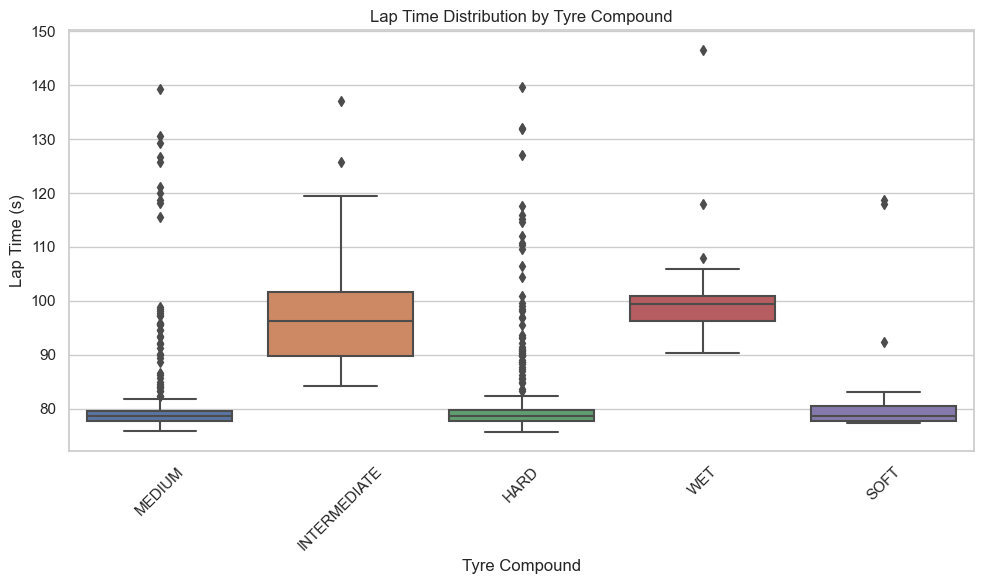

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="Compound", y="LapTime_sec")
plt.title("Lap Time Distribution by Tyre Compound")
plt.xticks(rotation=45)
plt.ylabel("Lap Time (s)")
plt.xlabel("Tyre Compound")
plt.tight_layout()
plt.show()

#laptimes seem to have no major difference when looking at medium hard and soft but there could be difference for other tracks.

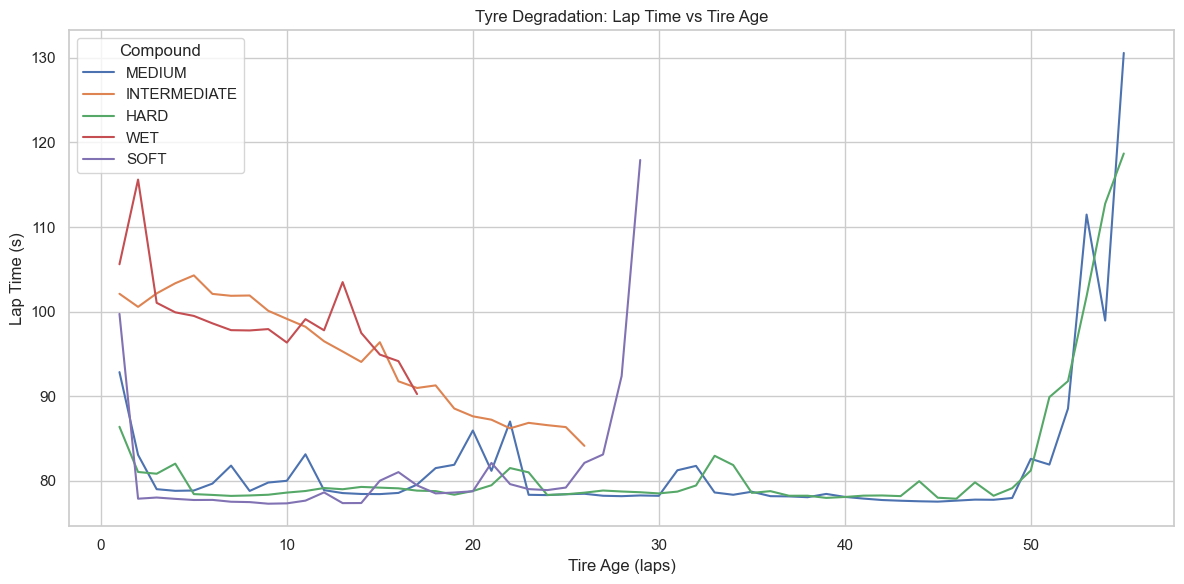

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x="TireAge", y="LapTime_sec", hue="Compound", ci=None)
plt.title("Tyre Degradation: Lap Time vs Tire Age")
plt.ylabel("Lap Time (s)")
plt.xlabel("Tire Age (laps)")
plt.legend(title="Compound")
plt.tight_layout()
plt.show()
# i m confused that can they go over 50 laps with just one medium or hard but monaco race is 78 laps because its a shorter circuit,
# degradation based on laptime will vary according to tracklength. Need to consider tracklength when talking about a f1 season.

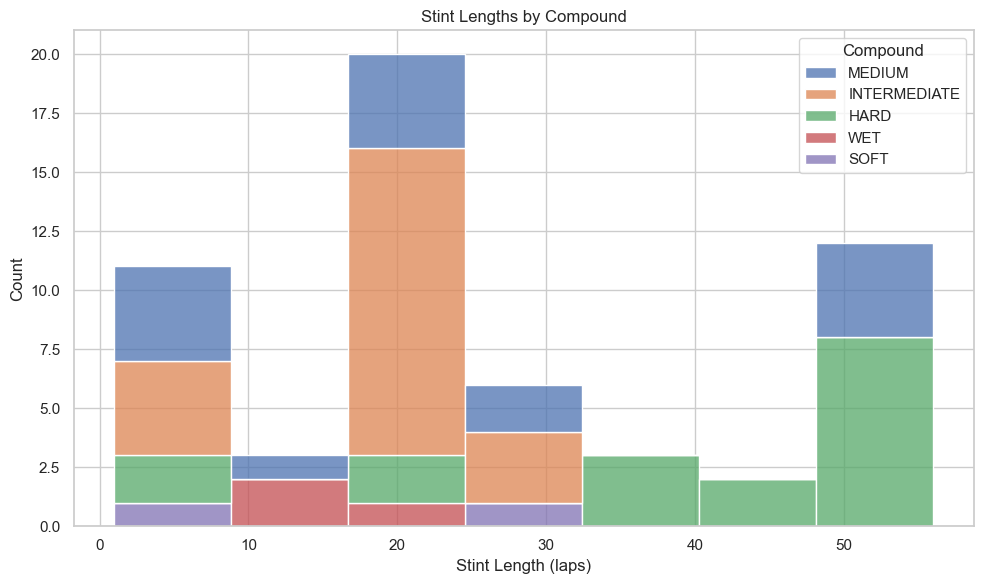

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df.drop_duplicates(["Driver", "Stint"]), x="StintLength", hue="Compound", multiple="stack")
plt.title("Stint Lengths by Compound")
plt.xlabel("Stint Length (laps)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
# the rain factor seems important as sudden rain can make a driver have added pitspots in the race (by default 2 extra)
# other than that this feature seems more important that others.
# in this particular race, it started raining early 

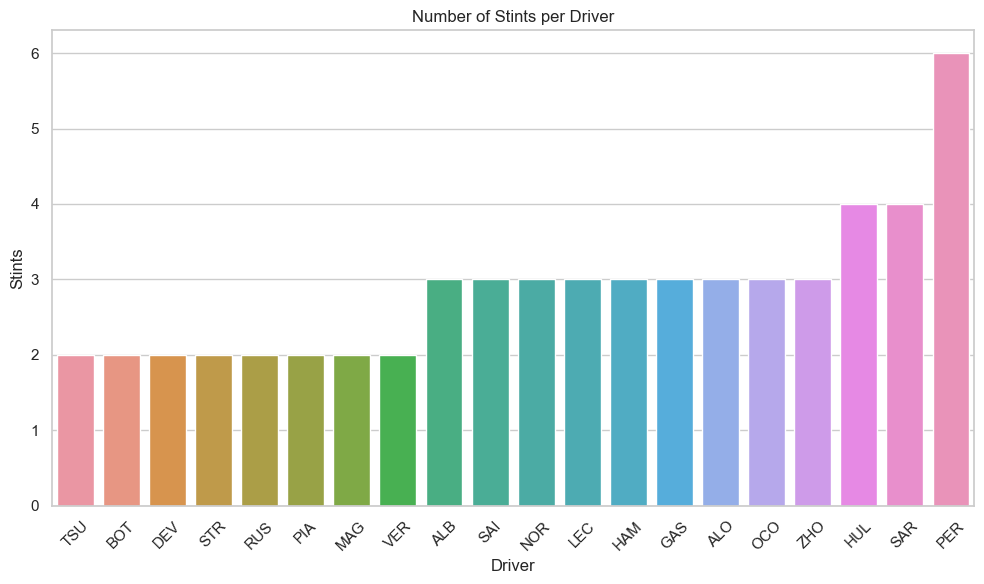

In [44]:
stint_counts = merged_df.groupby("Driver")["Stint"].nunique().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=stint_counts.index, y=stint_counts.values)
plt.title("Number of Stints per Driver")
plt.ylabel("Stints")
plt.xlabel("Driver")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#number of stints is heavily influencial in this case as drivers with 2 stints where able to come up in the leaderboard.
#number of increase in stints can be related to rain and this strategy decision is where work needs to be done.

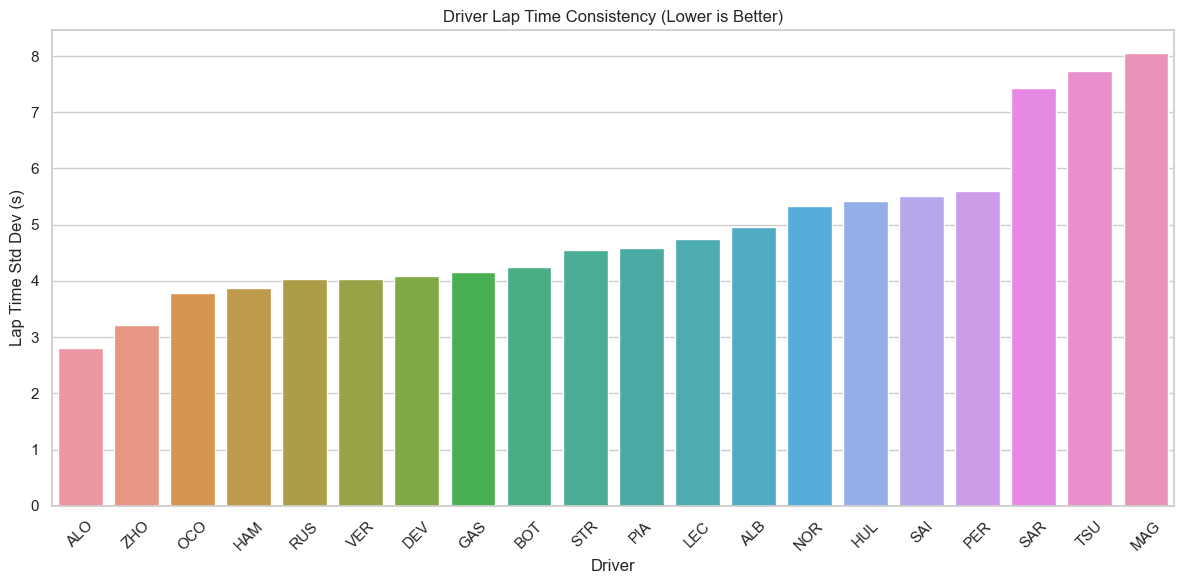

In [45]:
consistency = merged_df.groupby("Driver")["LapTimeDelta"].std().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=consistency.index, y=consistency.values)
plt.title("Driver Lap Time Consistency (Lower is Better)")
plt.ylabel("Lap Time Std Dev (s)")
plt.xlabel("Driver")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# shows which driver is overall faster but tire compound involvement is big here, eg. zho used softs in a stint.

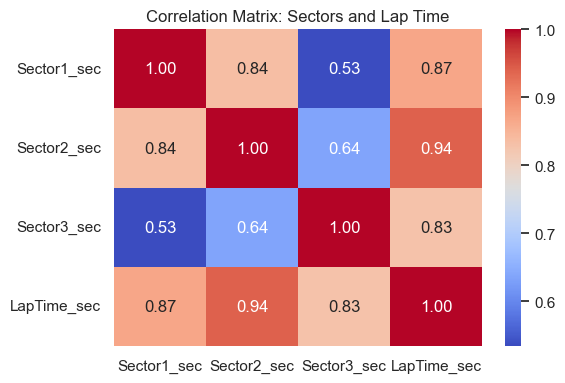

In [46]:
sector_corr = merged_df[["Sector1_sec", "Sector2_sec", "Sector3_sec", "LapTime_sec"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(sector_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Sectors and Lap Time")
plt.tight_layout()
plt.show()

# sector2>sector1>sector3 influence on the laptime. 
# This trend could be similar in all circuits (sure about middle sector being the longest, check about 1st and 3rd sectors.)

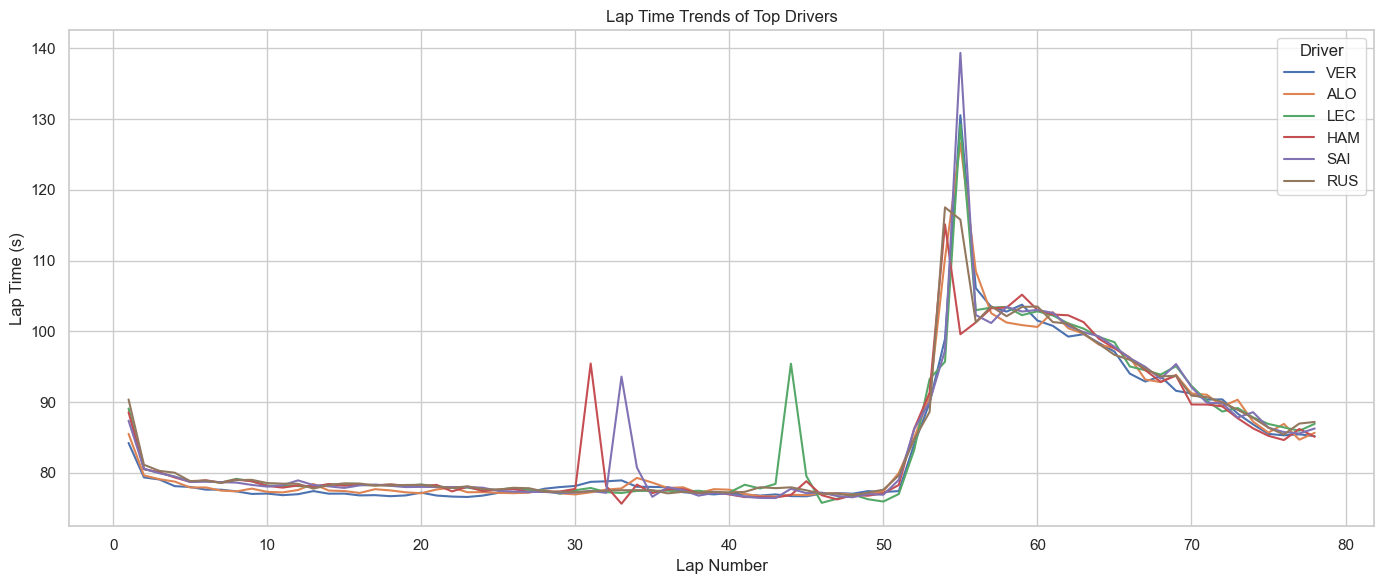

In [47]:
top_drivers = merged_df["Driver"].value_counts().nlargest(6).index

plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df[merged_df["Driver"].isin(top_drivers)],
             x="LapNumber", y="LapTime_sec", hue="Driver")
plt.title("Lap Time Trends of Top Drivers")
plt.ylabel("Lap Time (s)")
plt.xlabel("Lap Number")
plt.tight_layout()
plt.show()

#safety car 

In [48]:
import plotly.express as px

fig = px.line(merged_df,
              x="LapNumber",
              y="LapTime_sec",
              color="Driver",
              line_group="Stint",
              facet_col="Compound",
              hover_data=["Team", "Stint", "TyreLife"],
              title="Lap Time Degradation per Stint per Driver (by Compound)")
fig.update_layout(xaxis_title="Lap Number", yaxis_title="Lap Time (s)")
fig.show()



In [49]:
fig = px.box(merged_df,
             x="TireChange",
             y="LapTime_sec",
             color="Compound",
             title="Impact of Tyre Change on Lap Times",
             labels={"TireChange": "Was Tyre Changed?", "LapTime_sec": "Lap Time (s)"},
             points="all")
fig.show()


In [50]:
fig = px.scatter(merged_df,
                 x="StintLength",
                 y="AvgStintPace",
                 color="Compound",
                 size="TyreLife",
                 hover_data=["Driver", "Stint"],
                 title="Stint Length vs Average Stint Pace by Compound")
fig.update_layout(xaxis_title="Stint Length (laps)", yaxis_title="Average Pace (s)")
fig.show()

#check again

In [51]:
fig = px.scatter(merged_df,
                 x="TireAge",
                 y="LapTime_sec",
                 color="Driver",
                 facet_col="Compound",
                 trendline="ols",
                 hover_data=["Stint", "TyreLife"],
                 title="Lap Time vs Tyre Age (Driver Efficiency by Compound)")
fig.show()


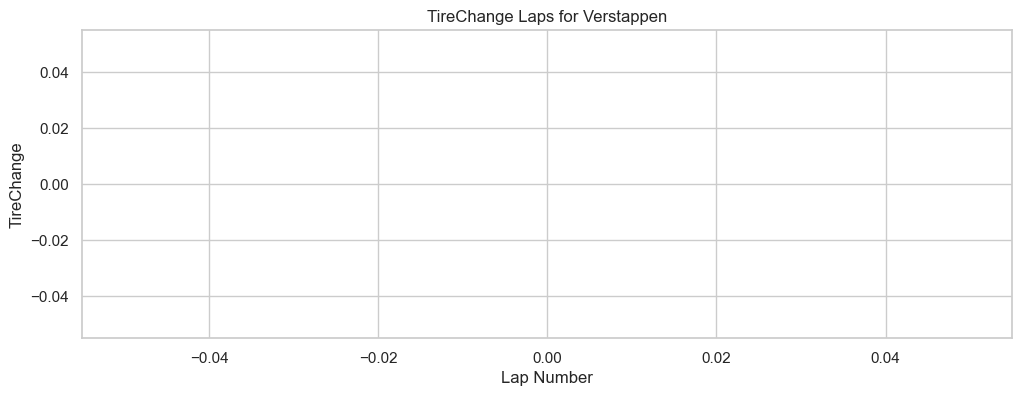

In [52]:
import matplotlib.pyplot as plt

# Example: Visualize a single driver
driver_name = 'Verstappen'  # replace with a valid name
driver_laps = merged_df[merged_df['Driver'] == driver_name]

plt.figure(figsize=(12, 4))
plt.plot(driver_laps['LapNumber'], driver_laps['TireChange'], marker='o')
plt.title(f"TireChange Laps for {driver_name}")
plt.xlabel("Lap Number")
plt.ylabel("TireChange")
plt.grid(True)
plt.show()


# Train ML Model

 Define Target Variable
📌 Target: Optimal Pit Stop Lap
📌 Features:
✔ Tire Age
✔ Lap Time Degradation
✔ Weather Conditions
✔ Position in Race
✔ Fuel Load

MLP

Remove norris and onwards as +1 lap for them

Stint: The Stint feature indicates which stint the lap belongs to. A new stint typically starts right after a pit stop.

IsOutlap / IsInlap: These flags (if available) indicate laps immediately following or preceding a pit stop.

StintLength: This feature gives context on how long a stint lasts, which can imply when a pit stop is due.

TireAge: This and related features, like DegradationPerLap, give an idea of how worn the tires are over the stint.

In [ ]:
# Drop rows with any NaNs
cleaned_df = merged_df.dropna()

# Define MLP-relevant features
mlp_features = [
    'LapNumber', 'Stint', 'TireAge', 'DegradationPerLap',
    'LapTime_RollingAvg_3', 'LapTimeDelta', 'IsOutlap', 'IsInlap',
    'AvgStintPace', 'CompoundEncoded', 'StintLength',
    'IsFreshTyre', 'LapTime_Normalized'
]

# Create MLP dataset
mlp_df = cleaned_df[mlp_features + ['TireChange']]


In [ ]:
mlp_df.head(10)

,LapNumber,Stint,TireAge,DegradationPerLap,LapTime_RollingAvg_3,LapTimeDelta,IsOutlap,IsInlap,AvgStintPace,CompoundEncoded,StintLength,IsFreshTyre,LapTime_Normalized,TireChange
1,2.0,1.0,2.0,-2.435500,81.802500,-4.871,False,False,79.237582,2,55,False,1.001633,False
2,3.0,1.0,3.0,-0.097667,80.893000,-0.293,False,False,79.237582,2,55,False,0.997936,False
3,4.0,1.0,4.0,-0.236250,78.856667,-0.945,False,False,79.237582,2,55,False,0.986009,False
4,5.0,1.0,5.0,-0.022000,78.407333,-0.110,False,False,79.237582,2,55,False,0.984621,False
5,6.0,1.0,6.0,-0.063167,77.929333,-0.379,False,False,79.237582,2,55,False,0.979838,False
6,7.0,1.0,7.0,-0.001000,77.764000,-0.007,False,False,79.237582,2,55,False,0.979750,False
7,8.0,1.0,8.0,-0.029500,77.556667,-0.236,False,False,79.237582,2,55,False,0.976771,False
8,9.0,1.0,9.0,-0.040667,77.353667,-0.366,False,False,79.237582,2,55,False,0.972152,False
9,10.0,1.0,10.0,0.005300,77.170667,0.053,False,False,79.237582,2,55,False,0.972821,False
10,11.0,1.0,11.0,-0.020545,76.991000,-0.226,False,False,79.237582,2,55,False,0.969969,False


In [ ]:
# Features and target
X_mlp = mlp_df.drop(columns=['TireChange'])
y_mlp = mlp_df['TireChange']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                    max_iter=300, random_state=42)

mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [ ]:
# Predictions
y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

# Create a result dataframe
result_df = X_test.copy()
result_df['Actual_TireChange'] = y_test.values
result_df['Predicted_TireChange'] = y_pred
result_df['TireChange_Probability'] = y_prob

# Reset index to match
result_df.reset_index(drop=True, inplace=True)

# View top laps by probability
top_laps = result_df.sort_values(by='TireChange_Probability', ascending=False)
top_laps[['LapNumber', 'Stint', 'TireAge', 'DegradationPerLap', 'TireChange_Probability']].head(10)


,LapNumber,Stint,TireAge,DegradationPerLap,TireChange_Probability
81,53.0,2.0,22.0,0.232000,0.019683
9,51.0,2.0,19.0,0.085105,0.013816
118,47.0,2.0,14.0,-0.034857,0.009389
72,50.0,2.0,19.0,0.017316,0.008840
1,46.0,2.0,15.0,-0.132200,0.007428
64,42.0,2.0,9.0,-0.020444,0.007155
98,39.0,2.0,8.0,0.015750,0.006678
109,41.0,2.0,10.0,-0.037400,0.006221
116,42.0,2.0,10.0,0.048200,0.005766
103,37.0,2.0,5.0,-0.032800,0.004618


On the right track with the output but the model is not confident as you can see the tire change probablities are really low.

Tyre life> Tyre age> is fresh tyre> lap number feature importance.

lap 67 is the most optimal lap but this binary model (randomforestclassifier) seems to be priety basic and i feel like lap 67 is not optimal, no other tire change is found.need to switch to a multi class classifier.(this model is removed now)

Optimize & Deploy the Model
✅ Hyperparameter Tuning: Use GridSearchCV to improve accuracy
✅ Feature Selection: Remove less relevant features
✅ Deploy API: Serve predictions via Flask/FastAPI
✅ Web Dashboard: Use Streamlit for interactive strategy visualization



Add real-time race data for live predictions

Incorporate pit lane time loss factor

Simulate multiple pit strategies for optimal decision-making

Sudden rain during race can trigger a tire change to inters or wet, choice is based on class of rain.